In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [354]:
data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking the missing value

In [355]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

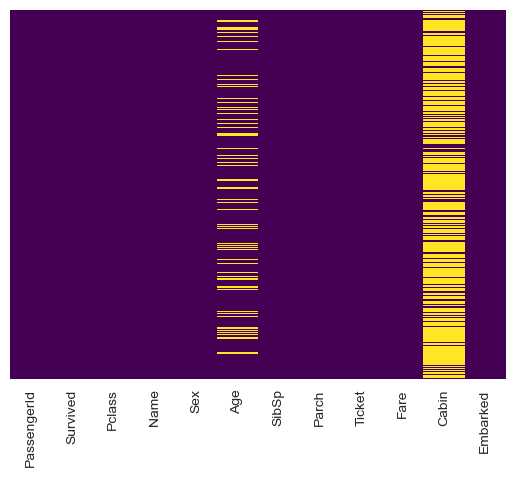

In [356]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###  count of survived and not survived

<Axes: xlabel='Survived', ylabel='count'>

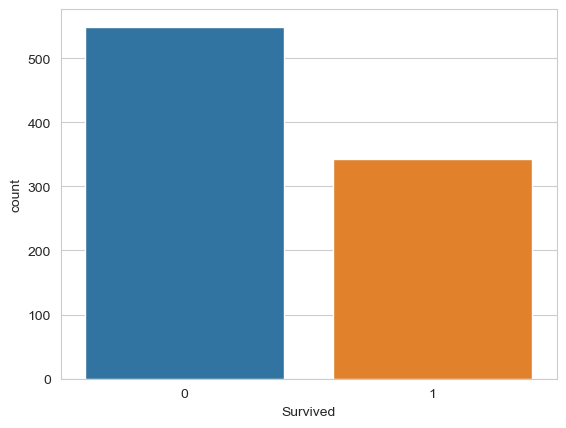

In [357]:
sns.set_style('whitegrid')  #background white-grey stripes
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Survived', ylabel='count'>

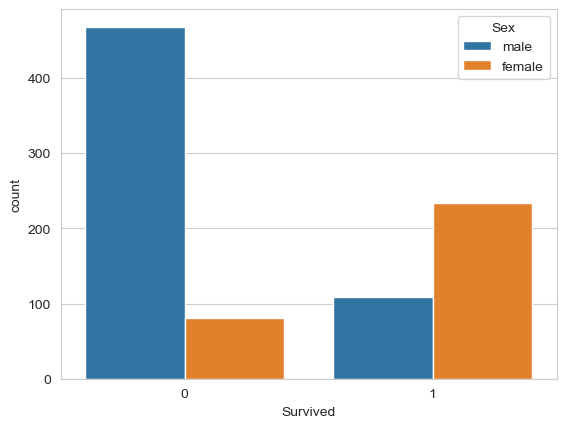

In [358]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data)

<Axes: xlabel='Survived', ylabel='count'>

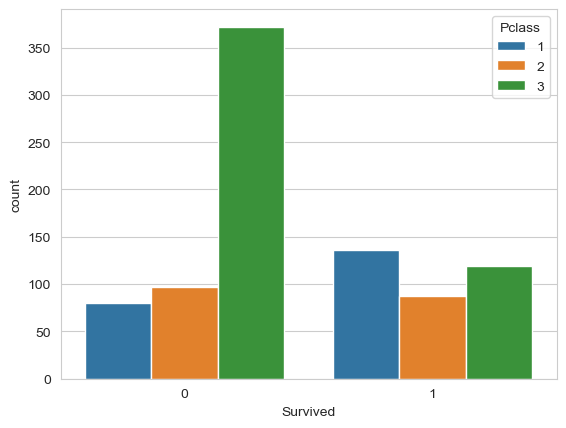

In [359]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data)

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


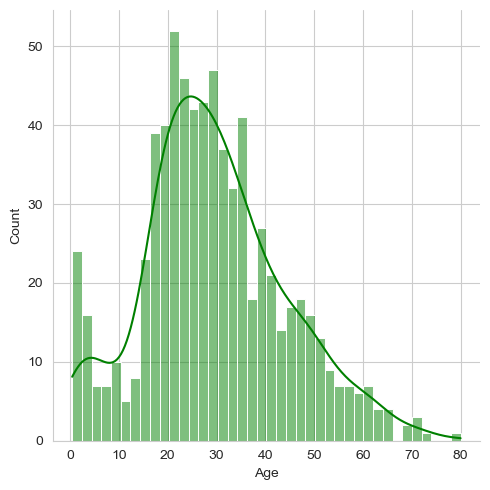

In [360]:
sns.displot(data['Age'].dropna(),kde=True,color='green',bins=40) #kde=kernel Density Estimation

In [361]:
sns.__version__

'0.12.2'

#### Bins: The bins parameter specifies how many intervals or bins you want to divide your data into along the x-axis of the histogram. A larger number of bins will result in a more detailed representation of the data distribution, while a smaller number of bins will provide a broader overview.

#### Bin Size: The bin size is calculated based on the range of values in your data and the number of bins specified. For example, if your data ranges from 0 to 100 and you set bins=10, each bin will cover a range of 10 units (0-10, 10-20, ..., 90-100).

#### Histogram Interpretation: The histogram visualizes how your data is distributed across these bins. Each bar in the histogram represents the frequency or count of data points falling within that particular bin.

##### FOR ALPHA 
##### Here's a breakdown of the alpha parameter:
Values close to 1: Increase visibility of the bars; however, this may cause overlapping bars to obscure each other.

##### Values close to 0: Decrease visibility of the bars; however, this may reveal hidden structures due to reduced occlusion among bars.

<Axes: >

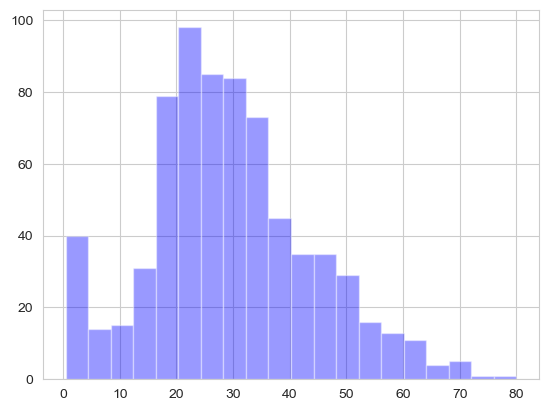

In [362]:
data['Age'].hist(bins='auto',color='blue',alpha=0.4)

<Axes: xlabel='SibSp', ylabel='count'>

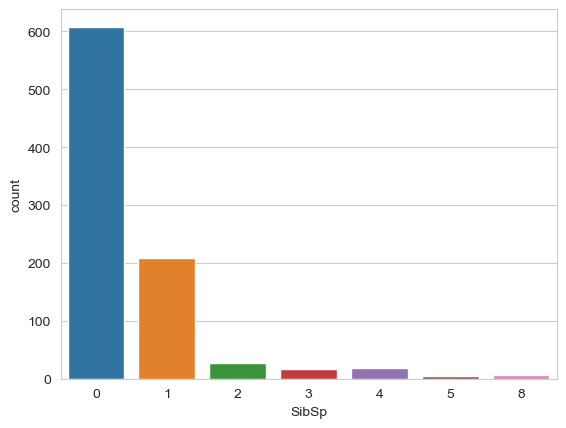

In [363]:
sns.countplot(x='SibSp',data=data)

### Boxplot for avg age in the Pclass

<Axes: xlabel='Pclass', ylabel='Age'>

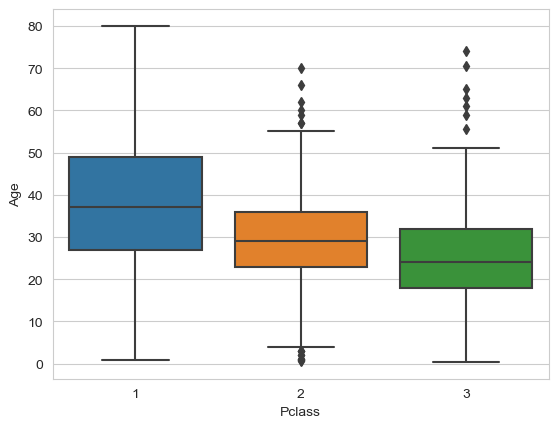

In [364]:
sns.boxplot(x='Pclass',y='Age',data=data)

In [365]:
def inputage(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [366]:
data['Age']=data[['Age','Pclass']].apply (inputage,axis=1)

<Axes: >

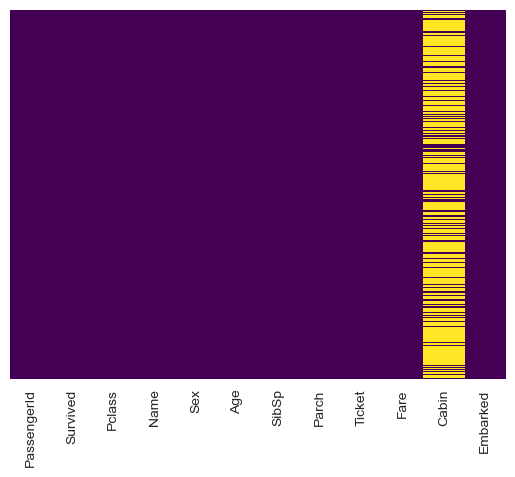

In [367]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [368]:
data.drop('Cabin',axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Conver categorical feature

Dummy variable trap to reduce the columns

In [369]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [370]:
pd.get_dummies (data['Sex'],drop_first=True).head()

,male
0,True
1,False
2,False
3,False
4,True


In [371]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
embark=pd.get_dummies(data['Embarked'],drop_first=True)

Drop the column that are not required

In [372]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [373]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


join the  newly created catogorical variable

In [374]:
data=pd.concat([data,sex,embark],axis=1)

In [375]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


### Logistic Regression model

In [376]:
data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [377]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)
from sklearn.ensemble import RandomForestClassifier
logmodel = RandomForestClassifier(n_estimators = 14, criterion = 'entropy', random_state = 0)
logmodel.fit(X_train,y_train)

RandomForestClassifier()

In [378]:
predictions = logmodel.predict(X_test)

In [379]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,predictions)
print(accuracy)

[[139  15]
 [ 31  83]]


In [380]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8283582089552238